# EM

In [15]:
import numpy as np
import numpy.random as rand
from scipy.linalg import inv
import matplotlib.pyplot as plt
from tqdm import tqdm 

In [4]:
def generate_data(A, sigma_x, alpha, beta):
    
    tau = rand.gamma(alpha, 1/beta)
    
    x = rand.multivariate_normal(np.zeros([A.shape[1]]), np.eye(A.shape[1]) * sigma_x);
    b = rand.multivariate_normal(np.zeros([A.shape[0]]), np.eye(A.shape[0]) / tau);
    y = A @ x + b
    
    return y, x, tau

In [5]:
N = 30;

A = rand.randn(N, N)

sigma_n = 1
alpha = 3
beta = 3
y, x, tau = generate_data(A, sigma_n, alpha, beta)

In [12]:
# Fonction retournant les paramètres a posteriori de x|y pour
# x ~ N(x0, Rx)
# y ~ N(Ax0, Rb)

# les matrices en arguments sont les inverses des matrices de covariances

def gaussgauss(y, A, Rxinv, Rbinv):
    
    Rpost = inv(A.T @ Rbinv @ A + Rxinv)
    xpost = Rpost @ (A.T @ Rbinv @ y)
    
    return xpost, Rpost

## Algorithme EM

In [16]:
def EM(y, A, sigma_x, alpha, beta, niter):
        
   tau = np.zeros([niter+1])  
   tau[0] = alpha/beta;
   N = A.shape[1]

   Rxinv = np.eye(A.shape[1]) / sigma_x
   

   for n in tqdm(range(niter)):
      Rbinv = np.eye(A.shape[0]) * tau[-1]
      xpost, Rpost = gaussgauss(y, A, Rxinv, Rbinv)
      tau[n+1] = (alpha + N/2 - 1) / (beta + (np.sum((y - A@ xpost)**2) + np.trace(A @ Rpost @ A.T))/2)
   return tau

# Évaluation

In [17]:
# moyenne et cov. a posteriori pour EM
N = 10_000
tauEM = EM(y, A, sigma_n, alpha, beta, N)
REM = np.linalg.inv(A.T @ A / sigma_n + tauEM[-1] * np.eye(A.shape[1]))
XEM = REM @ A.T @ y / sigma_n

100%|██████████| 10000/10000 [00:01<00:00, 9918.99it/s]


In [18]:
print(f"The mean squared error for EM is { np.mean((XEM-x)**2)}")

The mean squared error for EM is 0.2955849751569045


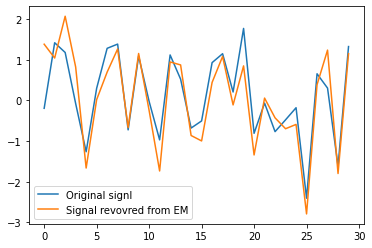

In [20]:
plt.plot(x, label ="Original signl")
plt.plot(XEM, label="Signal revovred from EM")
plt.legend()